In [1]:
import numpy as np
import cv2

# Add any python libraries here


#

#Parameters
## corner Detection
ch_block_size = 7
ch_ksize = 11
ch_k = 0.0006
anms_local_maxima_threshold = 0.01

d:\conda\envs\CV\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['../Data/Train/Set1/1.jpg', '../Data/Train/Set1/2.jpg', '../Data/Train/Set1/3.jpg']
(3, 450, 600, 3)
3


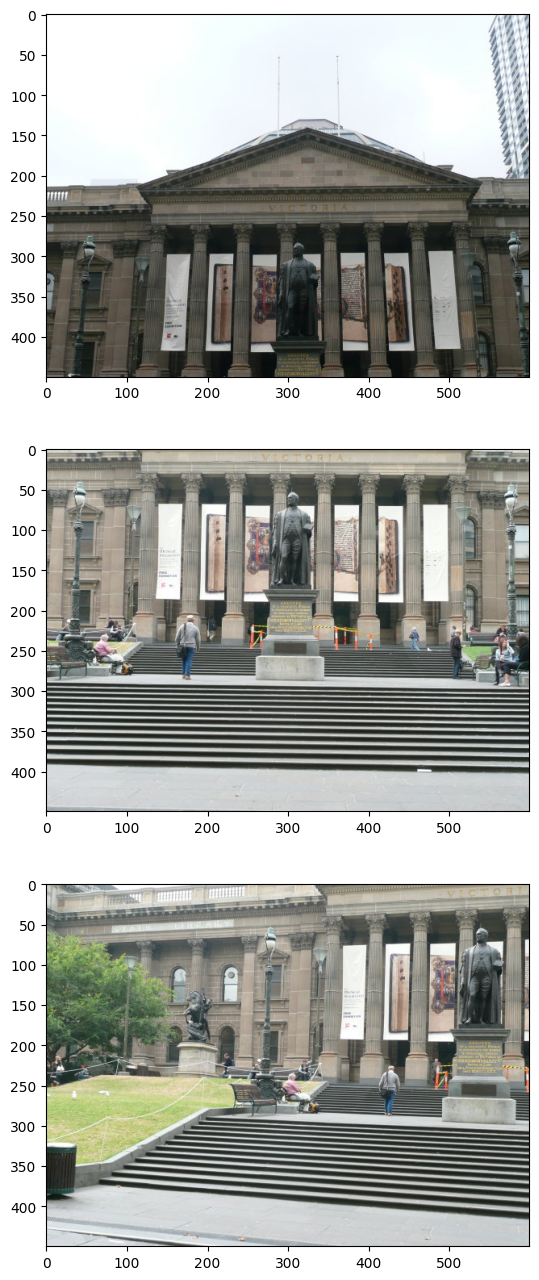

In [2]:
base_path = '../Data/Train/'
img_set = 'Set1/'
img_sequence = '2'
files = []

for file in glob.glob(base_path + img_set + "*.jpg",recursive=False):
    files.append(file.replace("\\","/"))
print(files)
# images_color = np.array(shape=(1len(files))
images_color = []
images_gray = []
for image_file in files:
    img_color_orig = cv2.imread(image_file)
    img_gray = cv2.cvtColor(img_color_orig,cv2.COLOR_BGR2GRAY)
    images_color.append(img_color_orig)
    images_gray.append(img_gray)

images_color = np.array(images_color)
print(images_color.shape)
make_subplots(len(files),images_color)

21657
25699
22166
3


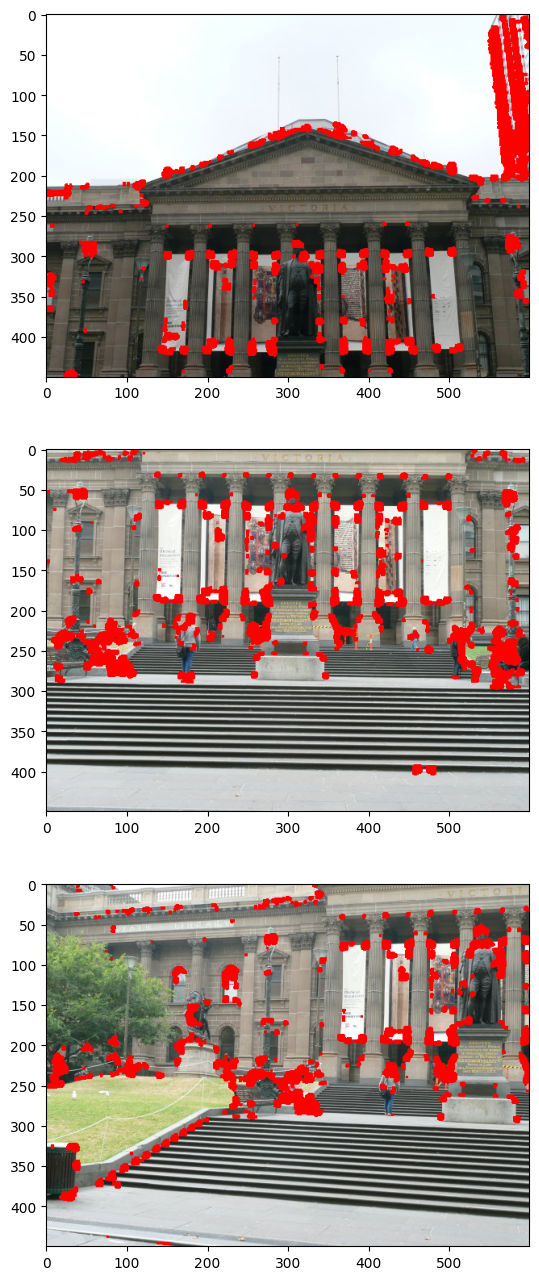

In [3]:

cornersOfImages = []
n_harris_corners_images = []
for i,image in enumerate(images_gray):
    cornersOfImg = cv2.cornerHarris(image,ch_block_size,ch_ksize,ch_k) ### TODO need to try out Shi-Tomasi Corner Detection instead
    n_harris_corners = np.sum(cornersOfImg>0.01*cornersOfImg.max())
    
    cornersOfImages.append(cornersOfImg)
    n_harris_corners_images.append(n_harris_corners)

cornersOfImages = np.array(cornersOfImages)
n_harris_corners_images = np.array(n_harris_corners_images)

embed_and_plot_corners(images_color,cornersOfImages)
# plt.savefig('ch.png',dpi=1200)
    


[[66 10]
 [66  3]
 [48  4]
 [ 8  7]
 [24  5]]


array([[66, 10]], dtype=int64)

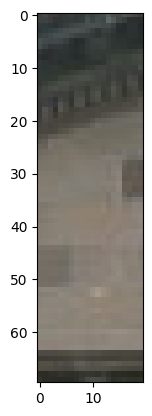

In [4]:
plt.imshow(cvt_for_plt(images_color[0][150:220,300:320]))
# print(cornersOfImages[0][150:220,300:320])
ret = peak_local_max(cornersOfImages[0][150:220,300:320],min_distance=3,threshold_rel=0.01)
print(ret)
ret[:1]

(934,)
(1117,)
(1181,)


C:\Users\saikr\AppData\Local\Temp\ipykernel_30204\1875820658.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  anms_distances = np.array(anms_distances)


(934, 2)
(1000, 2)
(1000, 2)
3


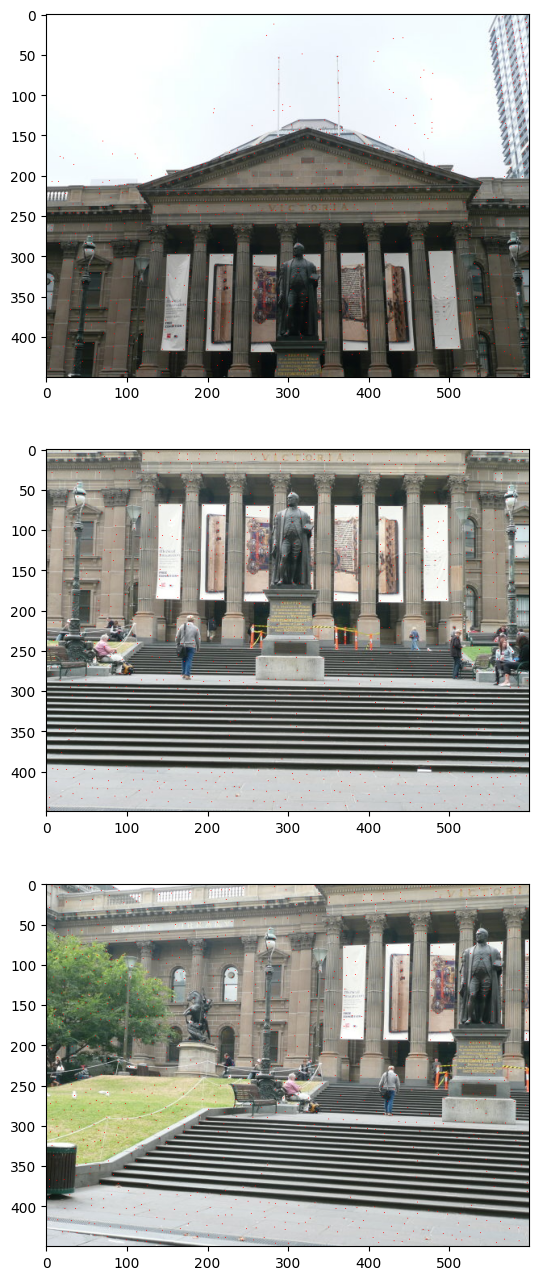

In [6]:


# plt.savefig('anms.png',dpi=1200)

In [9]:
print(feature_matches[0])
print(np.shape(feature_matches))
# make_subplots(3,[images_color[0][190:210,495:550],images_color[1][0:50,430:445]])

(298.0, 392.0)(166.0, 306.0)
(395,)


(298.0, 392.0)
(166.0, 306.0)


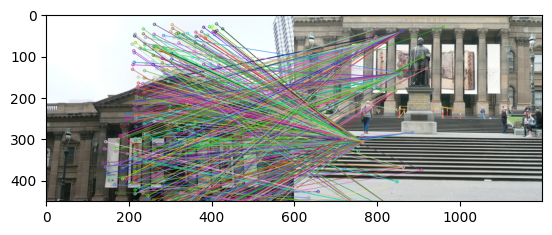

In [11]:
def plot_patches():
    f_matches_plot = []
    for match in feature_matches[:45]:
        x1 = int(match.keypoint1.pt[0])
        y1 = int(match.keypoint1.pt[1])

        if x1-10 < 0 or x1+10>img_gray.shape[0] or y1-10<0 or y1+10>img_gray.shape[1]:
            continue

        x2 = int(match.keypoint1.pt[0])
        y2 = int(match.keypoint1.pt[1])

        if x2-10 < 0 or x2+10>img_gray.shape[0] or y2-10<0 or y2+10>img_gray.shape[1]:
            continue

        patch1 = images_color[0][x1-10:x1+10, y1-10:y1+10]
        patch2 = images_color[1][x2-10:x2+10, y2-10:y2+10]

        f_matches_plot.extend([patch1, patch2])
    print(len(f_matches_plot))
    make_subplots(2,f_matches_plot)

In [8]:
import numpy as np
np.mean(np.array([1,2,3,4]),keepdims=True)
y = np.array([1, 2, 3], mask = [0, 1, 0], fill=0)
print(y)

TypeError: array() got an unexpected keyword argument 'mask'

In [18]:
import numpy as np
ret = np.random.rand(40,40)
print(ret.shape)
print(ret.flatten().shape)
print(ret.flatten()[::25].shape)
print(np.reshape(ret.flatten()[::25],newshape=(8,8)).shape)

(40, 40)
(1600,)
(64,)
(8, 8)


In [20]:
for i in range(3):
    for j in range(i+1,3):
        print(i,j)

0 0
0 1
0 2
1 1
1 2
2 2


In [2]:
a = [1,2,3]
b = [3,4,5]
for i,j in a,b:
    print(i,j)

ValueError: too many values to unpack (expected 2)

In [3]:
a = [1,2,3]
b = [True,False,False]
a[b]

TypeError: list indices must be integers or slices, not list